# pandas 리뷰
## 1. pandas의 이해
### 1) DataFrame
표형식의 데이터를 담는 데이터 컨테이너
- array + schema
- df.values + [df.index + df.columns + df.dtypes]
- 열(컬럼) 별로 dtype이 다를 수 있다.
- array는 행별로 데이터 연속, DataFrame은 열별로 데이터 연속
- df.columns: 열 이름
- df.index: 행 이름
- 통계량 쉽게 산출해 준다.
- plot 메소드를 이용하여 쉽게 시각화할 수 있다.

In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
X, y = data.data, data.target
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris = pd.DataFrame(X, columns=data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
type(iris)

pandas.core.frame.DataFrame

In [6]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [8]:
np.all(iris.values == data.data)

True

In [9]:
iris.shape

(150, 4)

In [10]:
iris.ndim

2

In [11]:
# 150 x 4
iris.size

600

In [12]:
iris.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
dtype: int64

In [13]:
iris.T.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal length (cm),5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width (cm),3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8


In [14]:
data.data.dtype, data.target.dtype, iris.dtypes

(dtype('float64'),
 dtype('int32'),
 sepal length (cm)    float64
 sepal width (cm)     float64
 petal length (cm)    float64
 petal width (cm)     float64
 dtype: object)

In [15]:
iris['Species'] = data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species                int32
dtype: object

### 1) 기초 탐색적데이터분석(EDA) 기능

In [17]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [18]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


[Quiz] 변수별 IQR(Q3 - Q1) 을 계산하여 출력해보자.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [19]:
irisStat = iris.describe()
irisStat.values[6] - irisStat.values[4]

array([1.3, 0.5, 3.5, 1.5, 2. ])

In [20]:
irisIQR = pd.Series(irisStat.values[6] - irisStat.values[4], index=irisStat.columns)
irisIQR

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
Species              2.0
dtype: float64

In [21]:
irisIQR = irisStat.iloc[6] - irisStat.iloc[4]
irisIQR

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
Species              2.0
dtype: float64

In [22]:
irisIQR = irisStat.loc['75%'] - irisStat.loc['25%']
irisIQR

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
Species              2.0
dtype: float64

In [23]:
irisStats = irisStat.append(irisIQR, ignore_index=True)
idx = list(irisStat.index) + ['IQR']
irisStats.index = idx
irisStats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000
IQR,1.300000,0.500000,3.500000,1.500000,2.000000


In [24]:
irisIQR = irisStat.loc['75%'] - irisStat.loc['25%']
irisIQR.name = 'IQR'
irisStats = irisStat.append(irisIQR)
irisStats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000
IQR,1.300000,0.500000,3.500000,1.500000,2.000000


### 2) Series의 이해
DataFrame의 하나의 열 = 1darray + index
- DataFrame = index를 공유하는 Series 들

In [25]:
iris.columns = ['sl', 'sw', 'pl', 'pw', 'species']
iris.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
type(iris.sl)

pandas.core.series.Series

In [27]:
iris.sw.index

RangeIndex(start=0, stop=150, step=1)

In [28]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [29]:
iris.values.shape

(150, 5)

In [30]:
iris.sw.values.shape

(150,)

In [31]:
iris.sw.values

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [32]:
iris.sw.index

RangeIndex(start=0, stop=150, step=1)

In [33]:
iris.iloc[100:111,[0,1]]
iris.loc[100:110,['sl','pl']]

,sl,pl
100,6.3,6.0
101,5.8,5.1
102,7.1,5.9
103,6.3,5.6
104,6.5,5.8
105,7.6,6.6
106,4.9,4.5
107,7.3,6.3
108,6.7,5.8
109,7.2,6.1


## 2. 데이터프레임의 색인
- iloc[start:end] : numpy array 규칙을 따르기 때문에, start는 포함, end는 제외
- loc[start:end] : 이름에 의한 색인을 하기 때문에, start와 end를 모두 포함.

[Quiz] iris 데이터에서 100 ~ 110 행과 sl와 pl 만의 열을 색인해보자.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [34]:
iris.values[100:110, [0, 2]]

array([[6.3, 6. ],
       [5.8, 5.1],
       [7.1, 5.9],
       [6.3, 5.6],
       [6.5, 5.8],
       [7.6, 6.6],
       [4.9, 4.5],
       [7.3, 6.3],
       [6.7, 5.8],
       [7.2, 6.1]])

In [35]:
iris.loc[100:110, ['sl', 'pl']]

,sl,pl
100,6.3,6.0
101,5.8,5.1
102,7.1,5.9
103,6.3,5.6
104,6.5,5.8
105,7.6,6.6
106,4.9,4.5
107,7.3,6.3
108,6.7,5.8
109,7.2,6.1


In [36]:
iris.iloc[100:110, [0, 2]]

,sl,pl
100,6.3,6.0
101,5.8,5.1
102,7.1,5.9
103,6.3,5.6
104,6.5,5.8
105,7.6,6.6
106,4.9,4.5
107,7.3,6.3
108,6.7,5.8
109,7.2,6.1


In [37]:
iris['sl']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sl, Length: 150, dtype: float64

In [38]:
iris.loc[100:110][['sl', 'pl']]

,sl,pl
100,6.3,6.0
101,5.8,5.1
102,7.1,5.9
103,6.3,5.6
104,6.5,5.8
105,7.6,6.6
106,4.9,4.5
107,7.3,6.3
108,6.7,5.8
109,7.2,6.1


In [39]:
li = [[1.1, 1.3, 5.2, 7.2],
      [0.5, 2.1, 2.2, 6.1]]
pd.DataFrame(li)

,0,1,2,3
0,1.1,1.3,5.2,7.2
1,0.5,2.1,2.2,6.1


In [40]:
dt = {'a':[1.1, 1.3, 5.2, 7.2],
      'b':[0.5, 2.1, 2.2, 6.1]}
pd.DataFrame(dt)

,a,b
0,1.1,0.5
1,1.3,2.1
2,5.2,2.2
3,7.2,6.1


In [41]:
dt = {'a':{'k':1.1, 'l':1.3, 'm':5.2, 'n':7.2},
      'b':{'k':1.2, 'l':3.3, 'm':4.2, 'n':6.2}}
tmp = pd.DataFrame(dt)
tmp

,a,b
k,1.1,1.2
l,1.3,3.3
m,5.2,4.2
n,7.2,6.2


In [42]:
tmp['k':'k']

,a,b
k,1.1,1.2


In [43]:
tmp[tmp.a > 2]

,a,b
m,5.2,4.2
n,7.2,6.2


### 1) 데이터 프레임의 직접적인 색인
|구분|점색인|불연색인|연속색인|논리색인|
|---|---|---|---|---|
|대상|열|열|행|행|
|방법|df['열명']|df[['열명1', '열명2', $\cdots$]]|df[s:e:i]|df[bv]|

In [44]:
iris.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
np.all(iris['sl'] == iris.sl)

True

일반적인 색인과 마찬가지로 start는 포함하고, end는 포함하지 않는다.

In [46]:
iris[1:3]

,sl,sw,pl,pw,species
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [47]:
try:
    iris[[1, 3]]
except Exception as e:
    print(e)

"None of [Int64Index([1, 3], dtype='int64')] are in the [columns]"


In [48]:
iris[['pl', 'sl']]

,pl,sl
0,1.4,5.1
1,1.4,4.9
2,1.3,4.7
3,1.5,4.6
4,1.4,5.0
...,...,...
145,5.2,6.7
146,5.0,6.3
147,5.2,6.5
148,5.4,6.2


In [49]:
bv = iris.sl < 5
bv.sum()

22

In [50]:
# iris 데이터 중에서 꽃받침의 길이가 5보다 작은 데이터
iris[bv]

,sl,sw,pl,pw,species
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
6,4.6,3.4,1.4,0.3,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0
11,4.8,3.4,1.6,0.2,0
12,4.8,3.0,1.4,0.1,0
13,4.3,3.0,1.1,0.1,0
22,4.6,3.6,1.0,0.2,0


### 2) 순서에 의한 색인
iloc[행순서, 열순서] : 점색인, 연속색인, 불연속색인을 각각 행별로 열별로 이용할 수 있다.

In [51]:
iris.iloc[100:105, [0, 2]]

,sl,pl
100,6.3,6.0
101,5.8,5.1
102,7.1,5.9
103,6.3,5.6
104,6.5,5.8


In [52]:
iris.iloc[[100,105], 0:2]

,sl,sw
100,6.3,3.3
105,7.6,3.0


iloc을 쓸 때는 논리색인을 사용할 수 없다. 반면, loc에서는 논리색인을 사용할 수 있다.

In [53]:
try:
    iris.iloc[bv, [0, 2]]
except Exception as e:
    print(e)

iLocation based boolean indexing on an integer type is not available


### 3) 이름에 의한 색인
loc[행이름, 열이름]: 점색인, 불연속색인, 연속색인, 논리색인까지 사용할 수 있다.
- 연속색인시 start:end로 표기하는 데, end를 포함한다.

In [54]:
iris.loc[100:105, ['sl', 'pl']]

,sl,pl
100,6.3,6.0
101,5.8,5.1
102,7.1,5.9
103,6.3,5.6
104,6.5,5.8
105,7.6,6.6


In [55]:
iris.loc[iris.sl < 5, [True, False, True, False, False]]

,sl,pl
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
6,4.6,1.4
8,4.4,1.4
9,4.9,1.5
11,4.8,1.6
12,4.8,1.4
13,4.3,1.1
22,4.6,1.0


### 4) Series에 대한 색인

In [56]:
sl = iris.sl
sl.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sl, dtype: float64

In [57]:
sl[:4]

0    5.1
1    4.9
2    4.7
3    4.6
Name: sl, dtype: float64

In [58]:
sl.loc[:4]

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sl, dtype: float64

In [59]:
sl[[0, 5]]

0    5.1
5    5.4
Name: sl, dtype: float64

In [60]:
sl[sl < 5]

1      4.9
2      4.7
3      4.6
6      4.6
8      4.4
9      4.9
11     4.8
12     4.8
13     4.3
22     4.6
24     4.8
29     4.7
30     4.8
34     4.9
37     4.9
38     4.4
41     4.5
42     4.4
45     4.8
47     4.6
57     4.9
106    4.9
Name: sl, dtype: float64

In [61]:
iris.pl[iris.sl > 5.]

0      1.4
5      1.7
10     1.5
14     1.2
15     1.5
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: pl, Length: 118, dtype: float64

## 3. DataFrame 생성
### 1) python container로 생성하기
입력 데이터로 array, dict, list 등을 사용할 수 있다.

In [62]:
iris = pd.DataFrame(data.data)
iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
iris.columns = ['sl', 'sw', 'pl', 'pw']
iris.columns

Index(['sl', 'sw', 'pl', 'pw'], dtype='object')

In [64]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [65]:
iris['species'] = data.target
iris.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [66]:
names = ['홍', '김', '박', '이']
ages = np.array([23, 12, 17, 31])
scores = (56, 72, 83, 45)

DataFrame 인자로 사전(dict)이 들어가면, key가 column명이 되고, value가 열 데이터가 된다.

In [67]:
studs = pd.DataFrame({'name':names, 'age':ages, 'score':scores})
studs.head()

,name,age,score
0,홍,23,56
1,김,12,72
2,박,17,83
3,이,31,45


DataFrame 인자로 리스트(list)이 들어가면, 리스트의 각 성분은 행이된다.

In [68]:
records = [['홍', 23, 58],
           ['김', 15, 78],
           ['이', 27, 85],
           ['박', 31, 46]]
records

[['홍', 23, 58], ['김', 15, 78], ['이', 27, 85], ['박', 31, 46]]

In [69]:
tmp = pd.DataFrame(records)
tmp

,0,1,2
0,홍,23,58
1,김,15,78
2,이,27,85
3,박,31,46


In [70]:
records = [['a', '홍', 23, 58],
           ['b', '김', 15, 78],
           ['c', '이', 27, 85],
           ['d', '박', 31, 46]]
records

[['a', '홍', 23, 58],
 ['b', '김', 15, 78],
 ['c', '이', 27, 85],
 ['d', '박', 31, 46]]

In [71]:
tmp = pd.DataFrame(records).set_index(0)
tmp

,1,2,3
0,,,
a,홍,23,58
b,김,15,78
c,이,27,85
d,박,31,46


In [72]:
tmp.loc['a':'c', 1:]

,1,2,3
0,,,
a,홍,23,58
b,김,15,78
c,이,27,85


### 2) 텍스트 파일로 생성

In [73]:
features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"] 

train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [74]:
adult = pd.read_csv(train_url, names=features)
adult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [75]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Martial Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [76]:
adult.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## 4. DataFrame을 이용한 연산
### 1) 다양한 통계 메소드
numpy, scipy, statmodels에서 제공하는 numpy 연산 함수 - universal 함수를 사용할 수 있다.

In [77]:
iris

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [78]:
iris.mean()

sl         5.843333
sw         3.057333
pl         3.758000
pw         1.199333
species    1.000000
dtype: float64

In [79]:
iris.std()

sl         0.828066
sw         0.435866
pl         1.765298
pw         0.762238
species    0.819232
dtype: float64

In [80]:
np.std(iris)

sl         0.825301
sw         0.434411
pl         1.759404
pw         0.759693
species    0.816497
dtype: float64

In [81]:
iris.agg(np.mean)

sl         5.843333
sw         3.057333
pl         3.758000
pw         1.199333
species    1.000000
dtype: float64

In [82]:
iris.agg('mean')

sl         5.843333
sw         3.057333
pl         3.758000
pw         1.199333
species    1.000000
dtype: float64

In [83]:
iris.agg(['mean', 'std'])

,sl,sw,pl,pw,species
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232


In [84]:
iris.agg({'sl':['mean', 'std'], 'sw':['max', 'min']})

,sl,sw
mean,5.843333,NaN
std,0.828066,NaN
max,NaN,4.4
min,NaN,2.0


scipy의 iqr 함수의 axis 기본값이 -1이 아닌, None이라서, array 전체에 걸쳐서 연산을 수행하므로, 다른 함수들과 같이 사용할 경우, axis의 기본값 문제로 에러가 발생한다.
- 이때 아래와 같이 axis의 기본값을 수정한 함수를 적용하여 문제를 해결할 수 있다.

In [85]:
from scipy.stats import iqr
iris.agg(iqr)

sl         1.3
sw         0.5
pl         3.5
pw         1.5
species    2.0
dtype: float64

In [86]:
from scipy.stats import iqr
def IQR(x): return iqr(x, axis=-1)
iris.agg({'sl':['mean', np.std], 'sw':[IQR,  np.min]})

,sl,sw
mean,5.843333,NaN
std,0.828066,NaN
IQR,NaN,0.5
amin,NaN,2.0


In [87]:
# 범주형 데이터에 대한 빈도 테이블
iris.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [88]:
# 꽃받침에 너비와 길이의 비율
iris['sRate'] = iris.sw / iris.sl
iris.head()

,sl,sw,pl,pw,species,sRate
0,5.1,3.5,1.4,0.2,0,0.686275
1,4.9,3.0,1.4,0.2,0,0.612245
2,4.7,3.2,1.3,0.2,0,0.680851
3,4.6,3.1,1.5,0.2,0,0.673913
4,5.0,3.6,1.4,0.2,0,0.720000


species를 종별 문자열값으로 변경하고 싶다.

In [89]:
iris.species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [90]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [91]:
mapper = {}
for (i, name) in zip(range(3), data.target_names):
    mapper[i] = name
mapper

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [92]:
mapper = {i:name for (i, name) in zip(range(3), data.target_names)}
mapper

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [93]:
iris.species = iris.species.map(mapper)

In [94]:
iris.head()

,sl,sw,pl,pw,species,sRate
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


In [95]:
iris.sRate = iris.sRate.map(lambda x: np.around(x, 2))
iris.head()

,sl,sw,pl,pw,species,sRate
0,5.1,3.5,1.4,0.2,setosa,0.69
1,4.9,3.0,1.4,0.2,setosa,0.61
2,4.7,3.2,1.3,0.2,setosa,0.68
3,4.6,3.1,1.5,0.2,setosa,0.67
4,5.0,3.6,1.4,0.2,setosa,0.72


In [96]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

[Quiz] species에 있는 문자열이 너무 길어서, 첫 3개의 문자열만 담고, 이를 대문자로 표기하고자 한다. 이를 수행해보자.

In [97]:
iris.species.str.upper().map(lambda x: x[:3])

0      SET
1      SET
2      SET
3      SET
4      SET
      ... 
145    VIR
146    VIR
147    VIR
148    VIR
149    VIR
Name: species, Length: 150, dtype: object

In [98]:
iris.species.map(lambda x: x[:3].upper())

0      SET
1      SET
2      SET
3      SET
4      SET
      ... 
145    VIR
146    VIR
147    VIR
148    VIR
149    VIR
Name: species, Length: 150, dtype: object

### 2) 다양한 데이터 변환 방법

In [99]:
adult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [100]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Martial Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


[Quiz] Education, Education-Num 이 중복된 데이터인지 식별해보자.

In [101]:
eduVal = adult.Education.value_counts()
print(eduVal.size)
eduVal

16


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [102]:
eduNum = adult["Education-Num"].value_counts()
print(eduNum.size)
eduNum

16


9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education-Num, dtype: int64

In [103]:
EduSum = (adult["Education-Num"].astype('str') + adult.Education).value_counts()
print(EduSum.size)
EduSum

16


9 HS-grad          10501
10 Some-college     7291
13 Bachelors        5355
14 Masters          1723
11 Assoc-voc        1382
7 11th              1175
12 Assoc-acdm       1067
6 10th               933
4 7th-8th            646
15 Prof-school       576
5 9th                514
8 12th               433
16 Doctorate         413
3 5th-6th            333
2 1st-4th            168
1 Preschool           51
dtype: int64

In [104]:
eduVal.index.name = 'EduName'
eduVal.reset_index(name='Edu')

,EduName,Edu
0,HS-grad,10501
1,Some-college,7291
2,Bachelors,5355
3,Masters,1723
4,Assoc-voc,1382
5,11th,1175
6,Assoc-acdm,1067
7,10th,933
8,7th-8th,646
9,Prof-school,576


In [105]:
pd.concat([eduVal.reset_index(name='Edu'), 
           eduNum.reset_index(name='EduNum'),
           EduSum.reset_index(name='EduSum')], axis=1)

,EduName,Edu,index,EduNum,index,EduSum
0,HS-grad,10501,9,10501,9 HS-grad,10501
1,Some-college,7291,10,7291,10 Some-college,7291
2,Bachelors,5355,13,5355,13 Bachelors,5355
3,Masters,1723,14,1723,14 Masters,1723
4,Assoc-voc,1382,11,1382,11 Assoc-voc,1382
5,11th,1175,7,1175,7 11th,1175
6,Assoc-acdm,1067,12,1067,12 Assoc-acdm,1067
7,10th,933,6,933,6 10th,933
8,7th-8th,646,4,646,4 7th-8th,646
9,Prof-school,576,15,576,15 Prof-school,576


In [106]:
adult.drop('Education', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education-Num   32561 non-null  int64 
 4   Martial Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Race            32561 non-null  object
 8   Sex             32561 non-null  object
 9   Capital Gain    32561 non-null  int64 
 10  Capital Loss    32561 non-null  int64 
 11  Hours per week  32561 non-null  int64 
 12  Country         32561 non-null  object
 13  Target          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [107]:
# adult.drop('Education', axis=1, inplace=True)
# adult.head()

pd.Categorical 함수는 범주형 변수를 Categrory 변수로 변환한다:
- 내부적으로는 정수로 표현된다.
- {문자열:정수, ...}, lookup 테이블을 저장해서, 문자열인 것처럼 보여준다.

In [108]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Martial Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [109]:
adult.Education = pd.Categorical(adult.Education)

In [110]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32561 non-null  int64   
 1   Workclass       32561 non-null  object  
 2   fnlwgt          32561 non-null  int64   
 3   Education       32561 non-null  category
 4   Education-Num   32561 non-null  int64   
 5   Martial Status  32561 non-null  object  
 6   Occupation      32561 non-null  object  
 7   Relationship    32561 non-null  object  
 8   Race            32561 non-null  object  
 9   Sex             32561 non-null  object  
 10  Capital Gain    32561 non-null  int64   
 11  Capital Loss    32561 non-null  int64   
 12  Hours per week  32561 non-null  int64   
 13  Country         32561 non-null  object  
 14  Target          32561 non-null  object  
dtypes: category(1), int64(6), object(8)
memory usage: 3.5+ MB


문자열 형식의 데이터는 one-hot encoding이 필요한데, 문자열 타입의 열을 한번에 식별하는 것이 필요하다.

In [111]:
adult.dtypes == 'object'

Age               False
Workclass          True
fnlwgt            False
Education         False
Education-Num     False
Martial Status     True
Occupation         True
Relationship       True
Race               True
Sex                True
Capital Gain      False
Capital Loss      False
Hours per week    False
Country            True
Target             True
dtype: bool

In [112]:
adult.dtypes

Age                  int64
Workclass           object
fnlwgt               int64
Education         category
Education-Num        int64
Martial Status      object
Occupation          object
Relationship        object
Race                object
Sex                 object
Capital Gain         int64
Capital Loss         int64
Hours per week       int64
Country             object
Target              object
dtype: object

In [113]:
objectCols = adult.dtypes[adult.dtypes == 'object'].index
objectCols

Index(['Workclass', 'Martial Status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Country', 'Target'],
      dtype='object')

In [114]:
for colm in objectCols:
    adult[colm] = pd.Categorical(adult[colm])
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32561 non-null  int64   
 1   Workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   Education       32561 non-null  category
 4   Education-Num   32561 non-null  int64   
 5   Martial Status  32561 non-null  category
 6   Occupation      32561 non-null  category
 7   Relationship    32561 non-null  category
 8   Race            32561 non-null  category
 9   Sex             32561 non-null  category
 10  Capital Gain    32561 non-null  int64   
 11  Capital Loss    32561 non-null  int64   
 12  Hours per week  32561 non-null  int64   
 13  Country         32561 non-null  category
 14  Target          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


### 3) 데이터 엿보기(EDA)
#### 범주형 데이터 빈도표

In [115]:
for colm in objectCols:
    print(colm)
    print(adult[colm].value_counts())
    print("==================")

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Martial Status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Martial Status, dtype: int64
Occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: in

#### 그룹별 빈도표
groupby 메소드를 사용하여 DataFrameGroupBy을 이용해야한다.

In [116]:
adult.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

In [117]:
stg = adult.groupby(['Sex', 'Target']).size()
stg

Sex      Target
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
dtype: int64

MultiIndex에는 level이 있다.

In [118]:
stg.index

MultiIndex([(' Female', ' <=50K'),
            (' Female',  ' >50K'),
            (  ' Male', ' <=50K'),
            (  ' Male',  ' >50K')],
           names=['Sex', 'Target'])

In [119]:
stg.index.levels

FrozenList([[' Female', ' Male'], [' <=50K', ' >50K']])

In [120]:
adult.groupby(['Sex', 'Target']).size().unstack()

Target,<=50K,>50K
Sex,,
Female,9592,1179
Male,15128,6662


In [121]:
adult.groupby(['Sex', 'Target']).size().unstack() / stg.sum()

Target,<=50K,>50K
Sex,,
Female,0.294586,0.036209
Male,0.464605,0.204601


In [122]:
adult.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

[Quiz] Education, Race, Country에 대해서도 Target과의 교차빈도표(빈도비율)을 작성해보자.

In [123]:
tmp.columns.astype('str')

Index(['1', '2', '3'], dtype='object')

In [124]:
for col in ['Education', 'Race', 'Country']:
    tmp = adult.groupby([col, 'Target']).size()
    sums = tmp.sum()
    print("======" + col + "======")
    tmp = tmp.unstack() / sums
    tmp.columns = tmp.columns.astype('str')
    tmp['50Rate'] = tmp[' >50K'] / tmp[' <=50K']
    print(tmp)
    print()

======Education======
Target            <=50K      >50K    50Rate
Education                                  
 10th          0.026750  0.001904  0.071183
 11th          0.034243  0.001843  0.053812
 12th          0.012285  0.001013  0.082500
 1st-4th       0.004975  0.000184  0.037037
 5th-6th       0.009736  0.000491  0.050473
 7th-8th       0.018611  0.001228  0.066007
 9th           0.014957  0.000829  0.055441
 Assoc-acdm    0.024631  0.008139  0.330424
 Assoc-voc     0.031357  0.011087  0.353575
 Bachelors     0.096250  0.068210  0.708679
 Doctorate     0.003286  0.009398  2.859813
 HS-grad       0.271060  0.051442  0.189780
 Masters       0.023464  0.029452  1.255236
 Preschool     0.001566  0.000000  0.000000
 Prof-school   0.004699  0.012991  2.764706
 Some-college  0.181321  0.042597  0.234925

======Race======
Target                  <=50K      >50K    50Rate
Race                                             
 Amer-Indian-Eskimo  0.008446  0.001106  0.130909
 Asian-Pac-Islande

#### 수치형 데이터 분석

In [125]:
numCols = adult.columns.drop(objectCols)
numCols = adult.columns.drop('Education')
numCols

Index(['Age', 'Workclass', 'fnlwgt', 'Education-Num', 'Martial Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain',
       'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

In [126]:
adult.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


수치형 데이터가 모두 int 타입이므로 빈도표를 작성해보자.

In [127]:
# numCols = numCols.drop('Education')
numCols

Index(['Age', 'Workclass', 'fnlwgt', 'Education-Num', 'Martial Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain',
       'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

In [128]:
for colm in numCols:
    print(colm)
    print(adult[colm].value_counts())
    print("==================")

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
fnlwgt
203488    13
123011    13
164190    13
148995    12
113364    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: fnlwgt, Length: 21648, dtype: int64
Education-Num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education-Num, dtype: int64
Martial Status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated              

#### 수치형 변수의 시각화

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education-Num'}>,
        <AxesSubplot:title={'center':'Capital Gain'}>],
       [<AxesSubplot:title={'center':'Capital Loss'}>,
        <AxesSubplot:title={'center':'Hours per week'}>]], dtype=object)

<Figure size 720x1080 with 0 Axes>

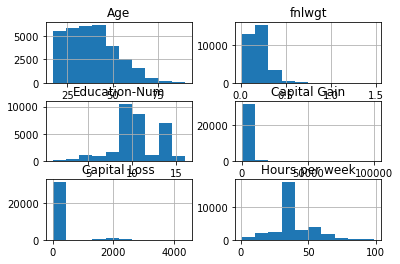

In [129]:

import matplotlib.pyplot as plt
plt.figure (figsize=(10,15))
adult.hist()

In [130]:
numCols = adult.columns[adult.dtypes != 'category']

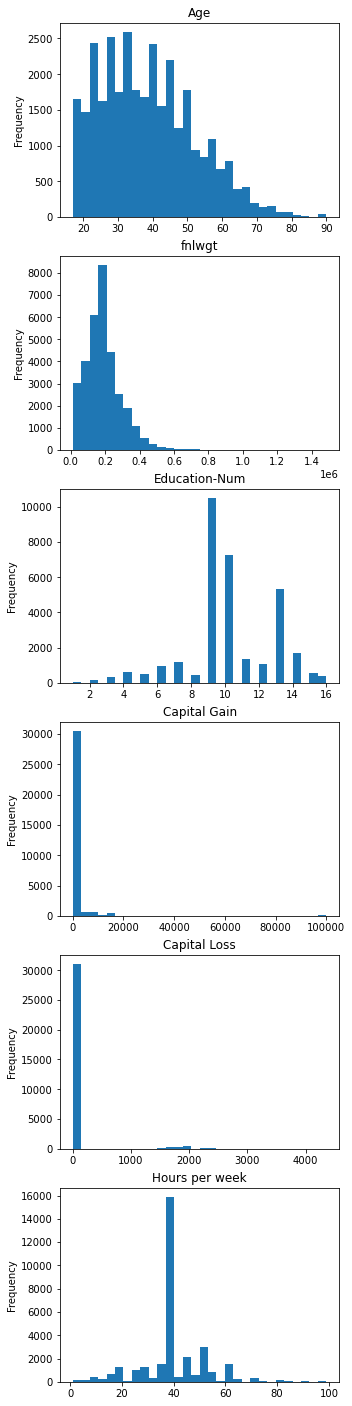

In [131]:
fig, axes = plt.subplots(numCols.size, 1, figsize=(5, 25))
axes = axes.ravel()
for i, colm in enumerate(numCols):
    adult[colm].plot.hist(bins=30, ax = axes[i])
    axes[i].set_title(colm)

(0.0, 100.0)

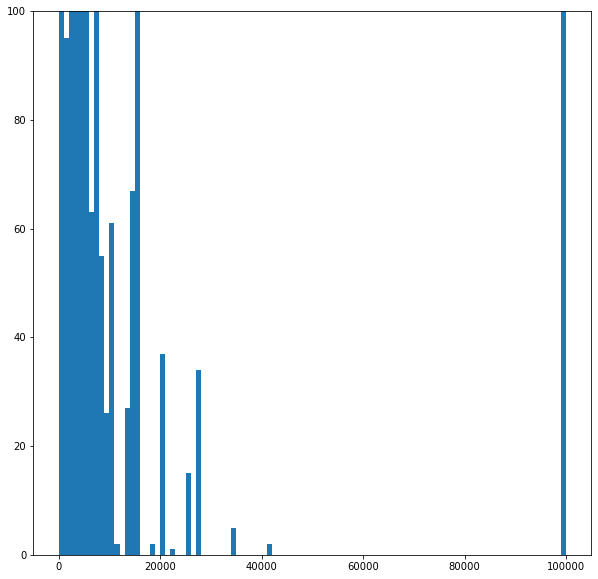

In [132]:
fig = plt.figure(figsize=(10, 10))
plt.hist(adult['Capital Gain'], bins=100)
plt.ylim(0, 100)

In [133]:
CGbins = pd.cut(adult['Capital Gain'], bins=100).value_counts().sort_index()
print(CGbins)

(-99.999, 999.99]       29904
(999.99, 1999.98]          95
(1999.98, 2999.97]        322
(2999.97, 3999.96]        344
(3999.96, 4999.95]        248
                        ...  
(94999.05, 95999.04]        0
(95999.04, 96999.03]        0
(96999.03, 97999.02]        0
(97999.02, 98999.01]        0
(98999.01, 99999.0]       159
Name: Capital Gain, Length: 100, dtype: int64


In [134]:
CGbins[-20:]

(79999.2, 80999.19]       0
(80999.19, 81999.18]      0
(81999.18, 82999.17]      0
(82999.17, 83999.16]      0
(83999.16, 84999.15]      0
(84999.15, 85999.14]      0
(85999.14, 86999.13]      0
(86999.13, 87999.12]      0
(87999.12, 88999.11]      0
(88999.11, 89999.1]       0
(89999.1, 90999.09]       0
(90999.09, 91999.08]      0
(91999.08, 92999.07]      0
(92999.07, 93999.06]      0
(93999.06, 94999.05]      0
(94999.05, 95999.04]      0
(95999.04, 96999.03]      0
(96999.03, 97999.02]      0
(97999.02, 98999.01]      0
(98999.01, 99999.0]     159
Name: Capital Gain, dtype: int64

Capital Gain의 99999는 결측값에 대한 기록으로 판단된다. 이 데이터를 어떻게 할꺼냐?
1. 테스트 데이터에서 Capital Gain이 99999인 데이터가 없다면, 과감히 제거할 수 있다.
2. 단순한 방법은 99999를 제외한 데이터의 median 또는 mean으로 대체
3. 선형회귀 모델을 만들어서, 대체하는 방법

1번 항목을 검토해보자.

In [135]:
adultst = pd.read_csv(test_url, names=features)
adultst[adultst['Capital Gain'] == 99999].size

1275

[Quiz] Capital Loss: 1000을 기준으로 데이터를 나누고
- histogram을 다시 그려보고
- 필요시 1000> 여부를 갖는 파생변수 생성 필요

In [136]:
cl1kl = adult['Capital Loss'][adult['Capital Loss'] <= 1000]
cl1ku = adult['Capital Loss'][adult['Capital Loss'] > 1000]

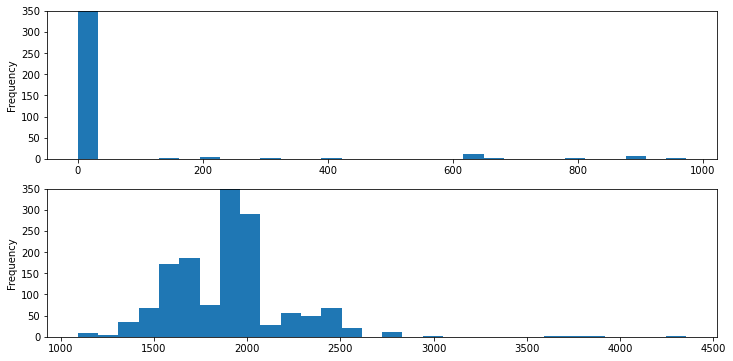

In [137]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
axes = axes.ravel()
for ax, s in zip(axes, [cl1kl, cl1ku]):
    ax.set_ylim(0, 350)
    s.plot.hist(bins=30, ax=ax)

- 0을 제외하면 좌우 대칭의 종모양의 분포를 가지고 있다.
- 지나치게 많은 0의 데이터는 특이성을 보이는 데이터로 보고, 0 여부의 파생변수를 생성하는 것이 맞겠다.

### 4) 데이터 전처리
- 연속형 변수 : scaling
- 범주형 변수 : one-hot encoding

#### 데이터 정규화 : log 변환
연속형 변수들이 Hours per week 변수를 제외하곤, light-skewed한 데이터이다. 머신러닝의 기본 가정으로 통계적인 가설에 따라 입력데이는 정규분포를 가정하고 있다.

이를 지원하기 위해 log 변환이 필요하다.

In [138]:
CG99999Idx = np.where(adult['Capital Gain'] == 99999)[0]

In [139]:
numCols

Index(['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week'],
      dtype='object')

In [140]:
for colm in ['Age', 'fnlwgt', 'Capital Gain']:
    adult[colm] = np.log1p(adult[colm])
adult.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,3.618360,11.983778,10.080679,0.734621,87.303830,40.437456
std,0.350031,0.630738,2.572720,2.454738,402.960219,12.347429
min,2.890372,9.416216,1.000000,0.000000,0.000000,1.000000
25%,3.367296,11.676981,9.000000,0.000000,0.000000,40.000000
50%,3.637586,12.091542,10.000000,0.000000,0.000000,40.000000
75%,3.891820,12.376035,12.000000,0.000000,0.000000,45.000000
max,4.510860,14.210727,16.000000,11.512925,4356.000000,99.000000


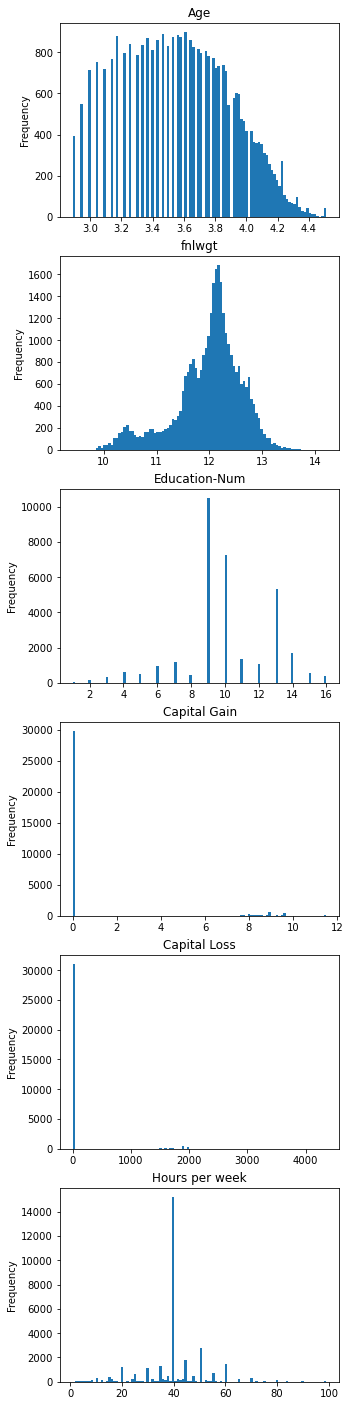

In [141]:
fig, axes = plt.subplots(numCols.size, 1, figsize=(5, 25))
axes = axes.ravel()
for i, colm in enumerate(numCols):
    adult[colm].plot.hist(bins=100, ax = axes[i])
    axes[i].set_title(colm)

<AxesSubplot:ylabel='Frequency'>

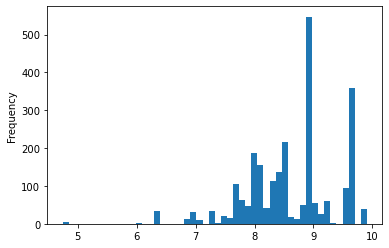

In [142]:
adult['Capital Gain'][(adult['Capital Gain'] <= 10) & (adult['Capital Gain'] > 0)].plot.hist(bins=50)

- Capital Gain은 오히려 log 변환을 하지 않는 것이 더 좋을 뻔 했다.

In [143]:
print(adult.shape)
print((adult['Capital Gain'] == 0).sum())
print((adult['Capital Loss'] == 0).sum())

(32561, 15)
29849
31042


#### 파생변수의 생성
Capital Gain과 Capital Loss에 지나치게 많은 0 값을 별도의 특징으로 변환시키자

In [144]:
adult['CGzero'] = np.where(adult['Capital Gain'] == 0, 1, 0)
adult['CLzero'] = np.where(adult['Capital Loss'] == 0, 1, 0)

#### 연속형 변수의 scaling
3가지 Scaling 방법이 존재
- MinMaxScaler : [0, 1] 변환
- StandardScaler: 평균 0, 표준편차를 1로 변환시킨다.
- RobustScaler: 중위수 0, IQR을 1로 변환시킨다.

In [145]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
adultStat = adult.describe()
IQR = adultStat.loc['75%'] - adultStat.loc['25%']
IQR.name = 'IQR'
adultStat = adultStat.append(IQR)
adultStat

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,CGzero,CLzero
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,3.618360,11.983778,10.080679,0.734621,87.303830,40.437456,0.916710,0.953349
std,0.350031,0.630738,2.572720,2.454738,402.960219,12.347429,0.276324,0.210893
min,2.890372,9.416216,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.367296,11.676981,9.000000,0.000000,0.000000,40.000000,1.000000,1.000000
50%,3.637586,12.091542,10.000000,0.000000,0.000000,40.000000,1.000000,1.000000
75%,3.891820,12.376035,12.000000,0.000000,0.000000,45.000000,1.000000,1.000000
max,4.510860,14.210727,16.000000,11.512925,4356.000000,99.000000,1.000000,1.000000
IQR,0.524524,0.699054,3.000000,0.000000,0.000000,5.000000,0.000000,0.000000


In [146]:
['Age', 'fnlwgt', 'Hours per week']

['Age', 'fnlwgt', 'Hours per week']

In [147]:
numCols

Index(['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week'],
      dtype='object')

In [148]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(adult[numCols])
adult[numCols] = scaler.transform(adult[numCols])

#### 범주형 데이터의 one-hot encoding

In [168]:
#adult.drop('Education-Num', axis=1, inplace=True)
adult

,Age,Workclass,fnlwgt,Education,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target,CGzero,CLzero
0,0.097790,State-gov,-1.192026,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,0.0,United-States,<=50K,0,1
1,0.560964,Self-emp-not-inc,-1.088893,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,-5.4,United-States,<=50K,1,1
2,0.049522,Private,0.271590,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.0,United-States,<=50K,1,1
3,0.669936,Private,0.392838,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.0,United-States,<=50K,1,1
4,-0.515305,Private,0.916197,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.0,Cuba,<=50K,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.582207,Private,0.524233,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,-0.4,United-States,<=50K,1,1
32557,0.144866,Private,-0.206569,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.0,United-States,>50K,1,1
32558,0.838762,Private,-0.229585,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.0,United-States,<=50K,1,1
32559,-0.957233,Private,0.174461,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,-4.0,United-States,<=50K,1,1


In [169]:
prepped = pd.get_dummies(adult, drop_first=True, sparse=False) #데이터의 가변수화
prepped

,Age,fnlwgt,Capital Gain,Capital Loss,Hours per week,CGzero,CLzero,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Target_ >50K
0,0.097790,-1.192026,7.684784,0.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.560964,-1.088893,0.000000,0.0,-5.4,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.049522,0.271590,0.000000,0.0,0.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.669936,0.392838,0.000000,0.0,0.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.515305,0.916197,0.000000,0.0,0.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.582207,0.524233,0.000000,0.0,-0.4,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,0.144866,-0.206569,0.000000,0.0,0.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,0.838762,-0.229585,0.000000,0.0,0.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,-0.957233,0.174461,0.000000,0.0,-4.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [189]:
prepped.columns.to_frame().head(50)

,0
Age,Age
fnlwgt,fnlwgt
Capital Gain,Capital Gain
Capital Loss,Capital Loss
Hours per week,Hours per week
CGzero,CGzero
CLzero,CLzero
Workclass_ Federal-gov,Workclass_ Federal-gov
Workclass_ Local-gov,Workclass_ Local-gov
Workclass_ Never-worked,Workclass_ Never-worked


### 5) 결측 데이터 처리하기
train 데이터에서 결측으로 예상되는 데이터가 159개, 테스트 데이터에서는 1275개이므로, 단순 제거는 올바른 방법이 아니다.

회귀 모델을 만들어서 결측처리 하도록 하겠습니다.
1. 전체 데이터에서 CG99999Idx 행들과 target열을 뺀 trainCG를 생성
2. 전체 데이터에서 CG99999Idx 행들을 포함하고 target열을 뺀 를 생성
3. trainCG에서 Capital Gain을 타겟으로 LinearRegression 모델을 학습하고,
4. testCG에 있는 Capital Gain을 예측하여, 이 값으로 prepped 데이터 CG99999Idx 행들의 Capital Gain의 값을 대체한다.

In [151]:
allIdx = np.arange(32561)
allIdx

array([    0,     1,     2, ..., 32558, 32559, 32560])

In [152]:
trainIdx = np.setdiff1d(allIdx, CG99999Idx, assume_unique=True)

In [153]:
trainCG = prepped.iloc[trainIdx].drop('Target_ >50K', axis=1)
trainCG.head()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,CGzero,CLzero,Workclass_ Federal-gov,Workclass_ Local-gov,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,0.097790,-1.192026,1.000000,7.684784,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.560964,-1.088893,1.000000,0.000000,0.0,-5.4,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.049522,0.271590,-0.333333,0.000000,0.0,0.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.669936,0.392838,-1.000000,0.000000,0.0,0.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.515305,0.916197,1.000000,0.000000,0.0,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
Xtr, ytr = trainCG.drop('Capital Gain', axis=1), trainCG['Capital Gain']

In [155]:
testCG = prepped.iloc[CG99999Idx].drop('Target_ >50K', axis=1)
Xts = testCG.drop('Capital Gain', axis=1)

In [156]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(Xtr, ytr)
CGpreds = lr.predict(Xts)
CGpreds

array([8.83297606, 8.63230807, 8.67913106, 8.6984567 , 8.78905405,
       8.70209891, 8.66846558, 8.670465  , 8.58843635, 8.69272985,
       8.73127996, 8.77742008, 8.76627667, 8.78094425, 8.76725772,
       8.780048  , 8.8152349 , 8.65753364, 8.65427325, 8.72680103,
       8.62279599, 8.76750937, 8.82895846, 8.75931222, 8.79101981,
       8.83387802, 8.71549332, 8.67168934, 8.64701687, 8.75968643,
       8.77558437, 8.72654699, 8.62392078, 8.73074408, 8.61446298,
       8.62972865, 8.7895454 , 8.6193512 , 8.72891547, 8.63075548,
       8.83396838, 8.68844328, 8.73481563, 8.66481373, 8.6711871 ,
       8.76349108, 8.61979108, 8.67595633, 8.70640403, 8.73308366,
       8.61967268, 8.62173016, 8.79289282, 8.77755316, 8.65425649,
       8.6920284 , 8.63122053, 8.82909492, 8.62614906, 8.65863505,
       8.68416024, 8.75895981, 8.57360599, 8.62969488, 8.67050758,
       8.67039424, 8.71764153, 8.7896005 , 8.83234647, 8.73510388,
       8.65971183, 8.71310471, 8.78968458, 8.70095135, 8.67115

In [157]:
CGpreds.shape

(159,)

In [158]:
prepped.loc[CG99999Idx, 'Capital Gain'] = CGpreds

## 5. 모델 생성

### 엔트로피 - 무질서함(각 개)
### 크로스 엔트로피 - 상호간의 무질서함(상호간)

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [192]:
params1 = {'C':[0.001, .01, .1, 1, 10, 100]}
params2 = {'max_depth':range(3, 10)}
logreg = LogisticRegression(max_iter=1000, n_jobs=-1) # max_iter는 반복학습 횟수
rf = RandomForestClassifier(n_jobs=-1) # -1을 주면 여유 CPU연산능력을 보유
X, y = prepped.drop('Target_ >50K', axis=1), prepped['Target_ >50K']

grid1 = GridSearchCV(logreg, params1, n_jobs=-1) #cv 파라메터는 데이터의 신뢰성 확보에 사용
grid2 = GridSearchCV(rf, params2, n_jobs=-1)
grid1.fit(X, y); grid2.fit(X, y)
grid1, grid2

(GridSearchCV(estimator=LogisticRegression(max_iter=1000, n_jobs=-1), n_jobs=-1,
              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]}),
 GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
              param_grid={'max_depth': range(3, 10)}))

In [191]:
# C파라메타가 클수록 학습 많이 가능(덜 민감, 과적합조심)
# C파라메타가 작은수록 학습 조금 밖에 못함(민감)
print(grid1.best_params_)
print(grid1.best_score_)
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 100}
0.8479162917785672
{'max_depth': 14}
0.8603545366269916


In [162]:
pd.DataFrame(grid1.cv_results_).T

,0,1,2,3,4,5
mean_fit_time,4.51154,11.512826,16.128487,15.737532,15.187203,11.22021
std_fit_time,0.760553,0.734297,0.437612,0.329201,0.414347,2.228461
mean_score_time,0.009775,0.009176,0.009576,0.009775,0.008976,0.005388
std_score_time,0.000399,0.000746,0.000488,0.000977,0.000631,0.001349
param_C,0.001,0.01,0.1,1,10,100
params,{'C': 0.001},{'C': 0.01},{'C': 0.1},{'C': 1},{'C': 10},{'C': 100}
split0_test_score,0.832796,0.841701,0.843697,0.844926,0.846,0.84554
split1_test_score,0.829238,0.843673,0.84398,0.844134,0.845055,0.844748
split2_test_score,0.837224,0.845977,0.85043,0.850584,0.847052,0.851966
split3_test_score,0.831235,0.844748,0.849355,0.851198,0.851658,0.851505


In [163]:
params2 = {'max_depth':range(9, 15)}
grid2 = GridSearchCV(rf, params2, n_jobs=-1)
grid1.fit(X, y); grid2.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': range(9, 15)})

In [164]:
pd.DataFrame(grid2.cv_results_).T

,0,1,2,3,4,5
mean_fit_time,2.141675,2.451448,2.478774,2.658692,2.67086,2.628772
std_fit_time,0.05625,0.558139,0.13667,0.352004,0.200059,0.389827
mean_score_time,0.547537,0.991549,1.075126,1.083904,1.301122,0.418082
std_score_time,0.324858,0.452957,0.363052,0.347558,0.28488,0.391729
param_max_depth,9,10,11,12,13,14
params,{'max_depth': 9},{'max_depth': 10},{'max_depth': 11},{'max_depth': 12},{'max_depth': 13},{'max_depth': 14}
split0_test_score,0.849839,0.851835,0.85076,0.853063,0.854138,0.856287
split1_test_score,0.853194,0.855344,0.854883,0.856265,0.857494,0.859029
split2_test_score,0.856726,0.85949,0.859183,0.861486,0.860258,0.862254
split3_test_score,0.858569,0.857494,0.860872,0.862254,0.859183,0.862869


[Quiz] <br>
excel_exam.xlsx 파일을 이용하여 반별 과목별 평균을 구하고, 반별 과목별로 전체 과목 평균보다 낮은 학생 id를 출력하라.


| class | math | english | science |
|-------|------|---------|---------|
| 1     | 2    | 1       | 3       |
| 1     | 1    | 4       | NaN     |
| 1     | NaN  | 2       | NaN     |
| 2     | 8    | 7       | 6       |
| 2     | 7    | 6       | 5       |

- 평균보다 높은 학생의 수는 절반일 수도, 그 보다 높거나, 낮을 수 있다.

In [309]:
df

,id,class,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [312]:
df = pd.read_excel('excel_exam.xlsx')
df2=df.iloc[:,1:].groupby('class').mean()
df2

,math,english,science
class,,,
1,46.25,94.75,61.50
2,61.25,84.25,58.25
3,45.00,86.50,39.25
4,56.75,84.75,55.00
5,78.00,74.25,83.25


In [323]:
tm=df.set_index('class')
tm.iloc[:,1:]=tm.iloc[:,1:]-df2
tm[(tm.math<0) | (tm.english<0) | (tm.science<0)]

,id,math,english,science
class,,,,
1,1,3.75,3.25,-11.50
1,2,13.75,2.25,-1.50
1,3,-1.25,-8.75,16.50
1,4,-16.25,3.25,-3.50
2,5,-36.25,-4.25,6.75
2,6,-11.25,4.75,39.75
2,7,18.75,5.75,-13.25
2,8,28.75,-6.25,-33.25
3,9,-25.00,11.50,-24.25


In [349]:
df['avg'] = (df.math + df.science + df.english)/3
fm=df.sort_values(by=['class','avg'])
fm

,id,class,math,english,science,avg
3,4,1,30,98,58,62.000000
0,1,1,50,98,50,66.000000
2,3,1,45,86,78,69.666667
1,2,1,60,97,60,72.333333
4,5,2,25,80,65,56.666667
7,8,2,90,78,25,64.333333
6,7,2,80,90,45,71.666667
5,6,2,50,89,98,79.000000
8,9,3,20,98,15,44.333333
11,12,3,45,85,32,54.000000


In [165]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Colab Notebooks/DataAnal')
!pwd

ModuleNotFoundError: No module named 'google'

In [ ]:
df = pd.read_excel("./excel_exam.xlsx")
df.head()

,id,class,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [303]:
meanscores = df.iloc[:, 1:].groupby('class').mean()
meanscores

,math,english,science
class,,,
1,46.25,94.75,61.50
2,61.25,84.25,58.25
3,45.00,86.50,39.25
4,56.75,84.75,55.00
5,78.00,74.25,83.25


In [304]:
tm = df.set_index('class')
tm.head()

,id,math,english,science
class,,,,
1,1,50,98,50
1,2,60,97,60
1,3,45,86,78
1,4,30,98,58
2,5,25,80,65


In [305]:
tm.iloc[:, 1:] = tm.iloc[:, 1:] - meanscores
tm.head(50)

,id,math,english,science
class,,,,
1,1,3.75,3.25,-11.50
1,2,13.75,2.25,-1.50
1,3,-1.25,-8.75,16.50
1,4,-16.25,3.25,-3.50
2,5,-36.25,-4.25,6.75
2,6,-11.25,4.75,39.75
2,7,18.75,5.75,-13.25
2,8,28.75,-6.25,-33.25
3,9,-25.00,11.50,-24.25


In [ ]:
np.where(tm.math > 0, np.nan, tm.id)

array([nan, nan,  3.,  4.,  5.,  6., nan, nan,  9., nan, nan, 12., 13.,
       14., nan, nan, 17., nan, nan, 20.])

In [ ]:
f = lambda x: np.where(x > 0, np.nan, tm.id)

In [ ]:
f(tm.math)

array([nan, nan,  3.,  4.,  5.,  6., nan, nan,  9., nan, nan, 12., 13.,
       14., nan, nan, 17., nan, nan, 20.])

In [ ]:
tm.iloc[:, 1:].transform(f)

,math,english,science
class,,,
1,NaN,NaN,1.0
1,NaN,NaN,2.0
1,3.0,3.0,NaN
1,4.0,NaN,4.0
2,5.0,5.0,NaN
2,6.0,NaN,NaN
2,NaN,NaN,7.0
2,NaN,8.0,8.0
3,9.0,NaN,9.0
